In [38]:
# Importing necessary modules
import gc
import copy
import os
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from model_data_definitions import *
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

import os
import numpy as np

# Directory where your npy files are stored
directory = 'aggregate_results'

# Initialize dictionary to hold data
data = {}

# Get list of all model names
models = initialize_all_models(1, 1)  # Arguments don't matter here.
model_names = [name for _, name in models]

# Iterate over files in directory
for filename in os.listdir(directory):
    if "-epochs-100-fold-" in filename and "-of-10.npy" in filename:
        #print(filename)
        
        # Split filename into parts
        parts = filename.split('-')
        print(parts)
        #print(parts[-3])

        # Extract dataset name (up to first hyphen)
        dataset_name = parts[0]
        #print(dataset_name)
        
        # Extract model name (from first hyphen to "epochs")
        model_name_parts = parts[1:-6].copy()
        model_name = '-'.join(model_name_parts)
        #print(model_name)

        # Skip file if not one of the expected models
        #if model_name not in model_names:
        #    continue

        # Extract fold number (from "fold" to "of")
        fold_number = parts[-3]
        
        # Load file 
        file_data = np.load(os.path.join(directory, filename), allow_pickle=True).item()

        # Add data to dictionary
        if dataset_name not in data:
            data[dataset_name] = {}
            
        if model_name not in data[dataset_name]:
            data[dataset_name][model_name] = {}

        data[dataset_name][model_name][fold_number] = file_data

# Now you can access the data as follows:
# data[dataset_name][model_name][fold_number]

['1027_ESL', 'ABEL', 'Spline (z=1)', 'epochs', '100', 'fold', '1', 'of', '10.npy']
['1027_ESL', 'ABEL', 'Spline (z=1)', 'epochs', '100', 'fold', '10', 'of', '10.npy']
['1027_ESL', 'ABEL', 'Spline (z=1)', 'epochs', '100', 'fold', '2', 'of', '10.npy']
['1027_ESL', 'ABEL', 'Spline (z=1)', 'epochs', '100', 'fold', '3', 'of', '10.npy']
['1027_ESL', 'ABEL', 'Spline (z=1)', 'epochs', '100', 'fold', '4', 'of', '10.npy']
['1027_ESL', 'ABEL', 'Spline (z=1)', 'epochs', '100', 'fold', '5', 'of', '10.npy']
['1027_ESL', 'ABEL', 'Spline (z=1)', 'epochs', '100', 'fold', '6', 'of', '10.npy']
['1027_ESL', 'ABEL', 'Spline (z=1)', 'epochs', '100', 'fold', '7', 'of', '10.npy']
['1027_ESL', 'ABEL', 'Spline (z=1)', 'epochs', '100', 'fold', '8', 'of', '10.npy']
['1027_ESL', 'ABEL', 'Spline (z=1)', 'epochs', '100', 'fold', '9', 'of', '10.npy']
['1027_ESL', 'ABEL', 'Spline (z=10)', 'epochs', '100', 'fold', '1', 'of', '10.npy']
['1027_ESL', 'ABEL', 'Spline (z=10)', 'epochs', '100', 'fold', '10', 'of', '10.npy']


['230_machine_cpu', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '6', 'of', '10.npy']
['230_machine_cpu', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '7', 'of', '10.npy']
['230_machine_cpu', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '8', 'of', '10.npy']
['230_machine_cpu', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '9', 'of', '10.npy']
['230_machine_cpu', 'ABEL', 'Spline (z=4)', 'epochs', '100', 'fold', '1', 'of', '10.npy']
['230_machine_cpu', 'ABEL', 'Spline (z=4)', 'epochs', '100', 'fold', '10', 'of', '10.npy']
['230_machine_cpu', 'ABEL', 'Spline (z=4)', 'epochs', '100', 'fold', '2', 'of', '10.npy']
['230_machine_cpu', 'ABEL', 'Spline (z=4)', 'epochs', '100', 'fold', '3', 'of', '10.npy']
['230_machine_cpu', 'ABEL', 'Spline (z=4)', 'epochs', '100', 'fold', '4', 'of', '10.npy']
['230_machine_cpu', 'ABEL', 'Spline (z=4)', 'epochs', '100', 'fold', '5', 'of', '10.npy']
['230_machine_cpu', 'ABEL', 'Spline (z=4)', 'epochs', '100', 'fold', '6', 'of', '10.npy']
['230_mac

['556_analcatdata_apnea2', 'One Parameter', 'epochs', '100', 'fold', '5', 'of', '10.npy']
['556_analcatdata_apnea2', 'One Parameter', 'epochs', '100', 'fold', '6', 'of', '10.npy']
['556_analcatdata_apnea2', 'One Parameter', 'epochs', '100', 'fold', '7', 'of', '10.npy']
['556_analcatdata_apnea2', 'One Parameter', 'epochs', '100', 'fold', '8', 'of', '10.npy']
['556_analcatdata_apnea2', 'One Parameter', 'epochs', '100', 'fold', '9', 'of', '10.npy']
['556_analcatdata_apnea2', 'Spline ANN (z=1)', 'epochs', '100', 'fold', '1', 'of', '10.npy']
['556_analcatdata_apnea2', 'Spline ANN (z=1)', 'epochs', '100', 'fold', '10', 'of', '10.npy']
['556_analcatdata_apnea2', 'Spline ANN (z=1)', 'epochs', '100', 'fold', '2', 'of', '10.npy']
['556_analcatdata_apnea2', 'Spline ANN (z=1)', 'epochs', '100', 'fold', '3', 'of', '10.npy']
['556_analcatdata_apnea2', 'Spline ANN (z=1)', 'epochs', '100', 'fold', '4', 'of', '10.npy']
['556_analcatdata_apnea2', 'Spline ANN (z=1)', 'epochs', '100', 'fold', '5', 'of', '

['599_fri_c2_1000_5', 'Lookup Table (z=10)', 'epochs', '100', 'fold', '2', 'of', '10.npy']
['599_fri_c2_1000_5', 'Lookup Table (z=10)', 'epochs', '100', 'fold', '3', 'of', '10.npy']
['599_fri_c2_1000_5', 'Lookup Table (z=10)', 'epochs', '100', 'fold', '4', 'of', '10.npy']
['599_fri_c2_1000_5', 'Lookup Table (z=10)', 'epochs', '100', 'fold', '5', 'of', '10.npy']
['599_fri_c2_1000_5', 'Lookup Table (z=10)', 'epochs', '100', 'fold', '6', 'of', '10.npy']
['599_fri_c2_1000_5', 'Lookup Table (z=10)', 'epochs', '100', 'fold', '7', 'of', '10.npy']
['599_fri_c2_1000_5', 'Lookup Table (z=10)', 'epochs', '100', 'fold', '8', 'of', '10.npy']
['599_fri_c2_1000_5', 'Lookup Table (z=10)', 'epochs', '100', 'fold', '9', 'of', '10.npy']
['599_fri_c2_1000_5', 'Lookup Table (z=2)', 'epochs', '100', 'fold', '1', 'of', '10.npy']
['599_fri_c2_1000_5', 'Lookup Table (z=2)', 'epochs', '100', 'fold', '10', 'of', '10.npy']
['599_fri_c2_1000_5', 'Lookup Table (z=2)', 'epochs', '100', 'fold', '2', 'of', '10.npy']
[

['617_fri_c3_500_5', 'Deep ReLU ANN', 'epochs', '100', 'fold', '10', 'of', '10.npy']
['617_fri_c3_500_5', 'Deep ReLU ANN', 'epochs', '100', 'fold', '2', 'of', '10.npy']
['617_fri_c3_500_5', 'Deep ReLU ANN', 'epochs', '100', 'fold', '3', 'of', '10.npy']
['617_fri_c3_500_5', 'Deep ReLU ANN', 'epochs', '100', 'fold', '4', 'of', '10.npy']
['617_fri_c3_500_5', 'Deep ReLU ANN', 'epochs', '100', 'fold', '5', 'of', '10.npy']
['617_fri_c3_500_5', 'Deep ReLU ANN', 'epochs', '100', 'fold', '6', 'of', '10.npy']
['617_fri_c3_500_5', 'Deep ReLU ANN', 'epochs', '100', 'fold', '7', 'of', '10.npy']
['617_fri_c3_500_5', 'Deep ReLU ANN', 'epochs', '100', 'fold', '8', 'of', '10.npy']
['617_fri_c3_500_5', 'Deep ReLU ANN', 'epochs', '100', 'fold', '9', 'of', '10.npy']
['617_fri_c3_500_5', 'Linear Model', 'epochs', '100', 'fold', '1', 'of', '10.npy']
['617_fri_c3_500_5', 'Linear Model', 'epochs', '100', 'fold', '10', 'of', '10.npy']
['617_fri_c3_500_5', 'Linear Model', 'epochs', '100', 'fold', '2', 'of', '10

['656_fri_c1_100_5', 'Spline ANN (z=8)', 'epochs', '100', 'fold', '9', 'of', '10.npy']
['656_fri_c1_100_5', 'Wide ReLU ANN', 'epochs', '100', 'fold', '1', 'of', '10.npy']
['656_fri_c1_100_5', 'Wide ReLU ANN', 'epochs', '100', 'fold', '10', 'of', '10.npy']
['656_fri_c1_100_5', 'Wide ReLU ANN', 'epochs', '100', 'fold', '2', 'of', '10.npy']
['656_fri_c1_100_5', 'Wide ReLU ANN', 'epochs', '100', 'fold', '3', 'of', '10.npy']
['656_fri_c1_100_5', 'Wide ReLU ANN', 'epochs', '100', 'fold', '4', 'of', '10.npy']
['656_fri_c1_100_5', 'Wide ReLU ANN', 'epochs', '100', 'fold', '5', 'of', '10.npy']
['656_fri_c1_100_5', 'Wide ReLU ANN', 'epochs', '100', 'fold', '6', 'of', '10.npy']
['656_fri_c1_100_5', 'Wide ReLU ANN', 'epochs', '100', 'fold', '7', 'of', '10.npy']
['656_fri_c1_100_5', 'Wide ReLU ANN', 'epochs', '100', 'fold', '8', 'of', '10.npy']
['656_fri_c1_100_5', 'Wide ReLU ANN', 'epochs', '100', 'fold', '9', 'of', '10.npy']
['663_rabe_266', 'ABEL', 'Spline (z=1)', 'epochs', '100', 'fold', '1', '

['706_sleuth_case1202', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '1', 'of', '10.npy']
['706_sleuth_case1202', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '10', 'of', '10.npy']
['706_sleuth_case1202', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '2', 'of', '10.npy']
['706_sleuth_case1202', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '3', 'of', '10.npy']
['706_sleuth_case1202', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '4', 'of', '10.npy']
['706_sleuth_case1202', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '5', 'of', '10.npy']
['706_sleuth_case1202', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '6', 'of', '10.npy']
['706_sleuth_case1202', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '7', 'of', '10.npy']
['706_sleuth_case1202', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '8', 'of', '10.npy']
['706_sleuth_case1202', 'ABEL', 'Spline (z=2)', 'epochs', '100', 'fold', '9', 'of', '10.npy']
['706_sleuth_case1202', 'ABEL', 'Spline (z=4)', 'epochs', '

In [53]:
data['230_machine_cpu']['Wide ReLU ANN']['10']['']

'Wide ReLU ANN'

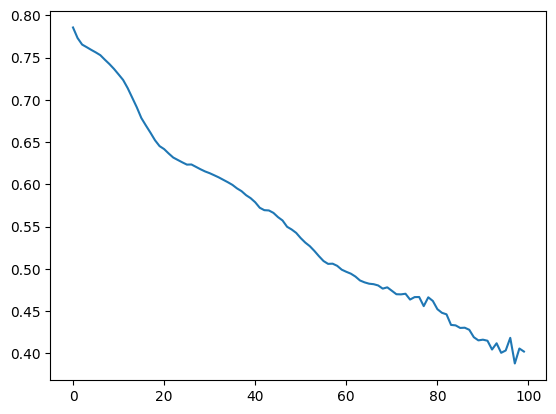

In [59]:
import matplotlib.pyplot as plt

plt.plot(data['192_vineyard']['Deep ReLU ANN']['4']['train_history'])

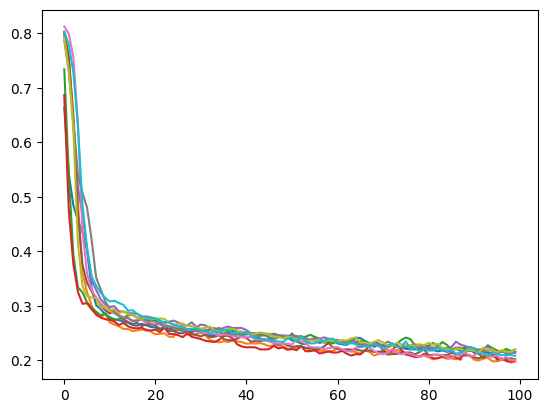

In [60]:
for fold in range(1,11):
    plt.plot(data['1027_ESL']['Deep ReLU ANN'][str(fold)]['train_history'])

In [34]:
import matplotlib.pyplot as plt

# Initialize list to hold model names and dataset names
model_names = []
dataset_names = []

# Iterate over files in directory
for filename in os.listdir(directory):
    if "-epochs-100-fold-" in filename and "-of-10.npy" in filename:
        
        # Split filename into parts
        parts = filename.split('-')
        
        # Extract dataset name (up to first hyphen)
        dataset_name = parts[0]
        
        # Extract model name (from first hyphen to "epochs")
        model_name_parts = parts[1:-6].copy()
        model_name = '-'.join(model_name_parts)

        # Skip file if not one of the expected models
        if model_name not in model_names:
            continue
            
        # Extract fold number (from "fold" to "of")
        fold_number = parts[-3]
        
        # Load file 
        file_data = np.load(os.path.join(directory, filename), allow_pickle=True).item()

        # Add data to dictionary
        if dataset_name not in data:
            data[dataset_name] = {}
            dataset_names.append(dataset_name)  # Add to dataset names list
            
        if model_name not in data[dataset_name]:
            data[dataset_name][model_name] = {}
            if model_name not in model_names:  # Add to model names list only once
                model_names.append(model_name)

        data[dataset_name][model_name][fold_number] = file_data

# Now you can access the data as follows:
# data[dataset_name][model_name][fold_number]


In [35]:
data[dataset_names]

In [37]:
dataset_name

'titanic'